<a href="https://colab.research.google.com/github/ArunVignesh75/Machine-Learning/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision Workouts 

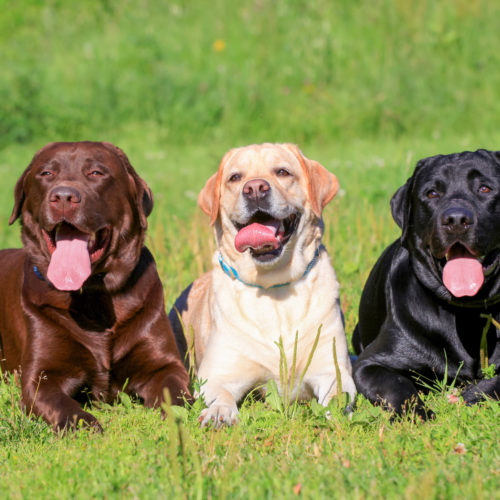

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread("dog1.jpeg")
cv2_imshow(img)

In [ ]:
from google.colab.patches import cv2_imshow


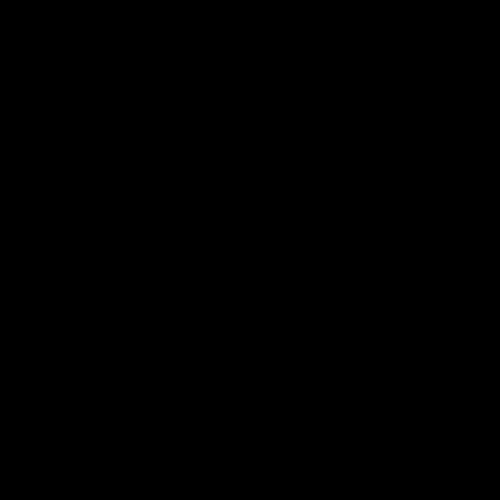

In [ ]:
import numpy as np
blank = np.zeros(img.shape,dtype = 'uint8')
cv2_imshow(blank)

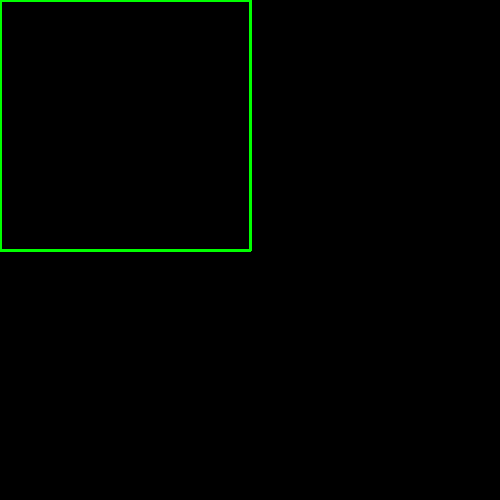

In [ ]:
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness = 2)
cv2_imshow(blank)

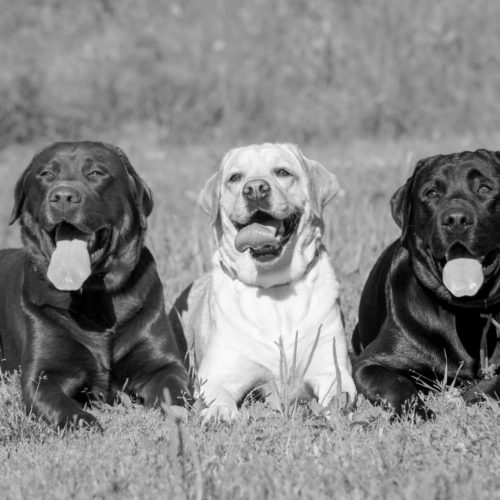

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

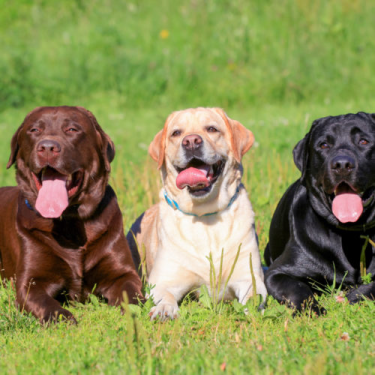

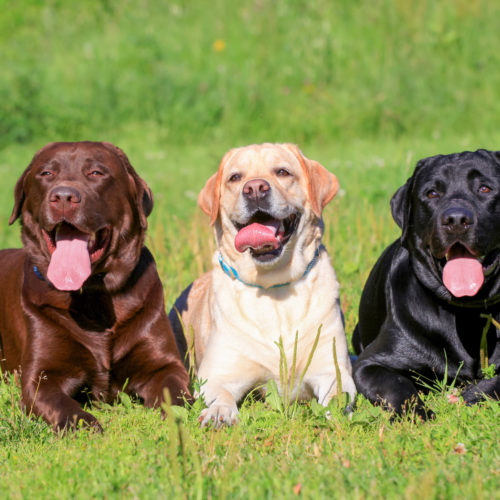

In [ ]:
def scale(frame, scale = 0.75):
  width = int(frame.shape[1] * scale)
  height = int(frame.shape[0] * scale)
  dimensions = (width,height)
  return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)
resized_image = scale(img)
cv2_imshow(resized_image)
cv2_imshow(img)

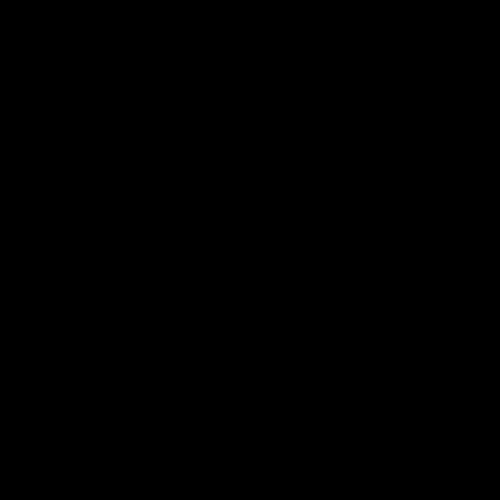

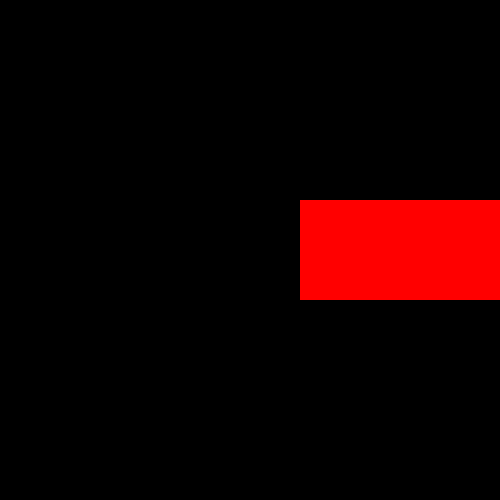

In [ ]:
blank1 = np.zeros((500,500,3),dtype = 'uint8')
cv2_imshow(blank1)
blank1[200:300,300:500] = 0,0,255
cv2_imshow(blank1)

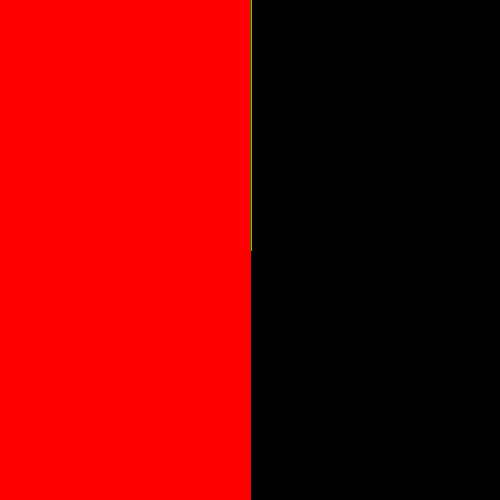

In [ ]:
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,0,255),thickness = -1)
cv2_imshow(blank)

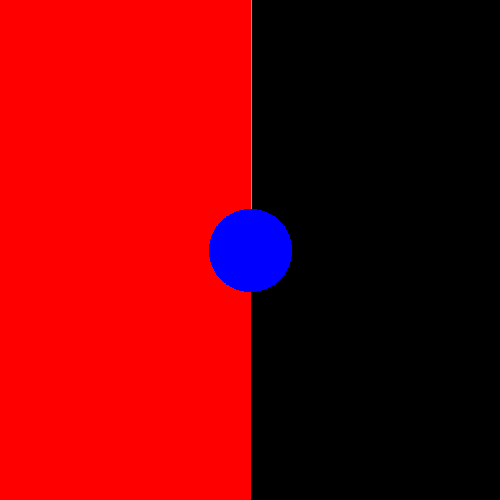

In [ ]:
cv.circle(blank,(blank.shape[1]//2,blank.shape[0]//2), 40,(255,0,0), thickness = -1)
cv2_imshow(blank)

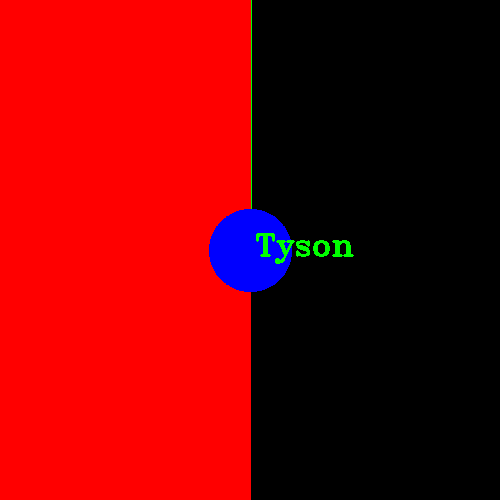

In [ ]:
cv.putText(blank,'Tyson',(255,255),cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv2_imshow(blank)

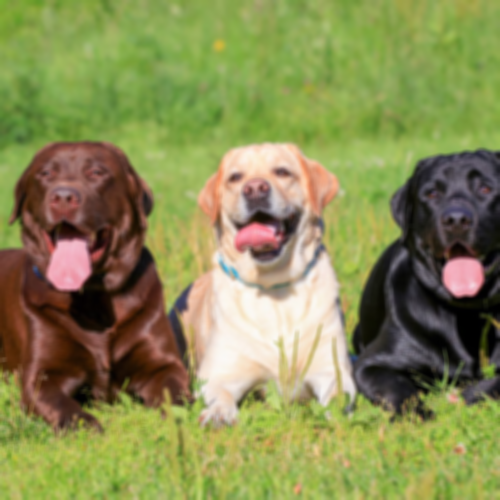

In [ ]:
blur = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT)
cv2_imshow(blur)

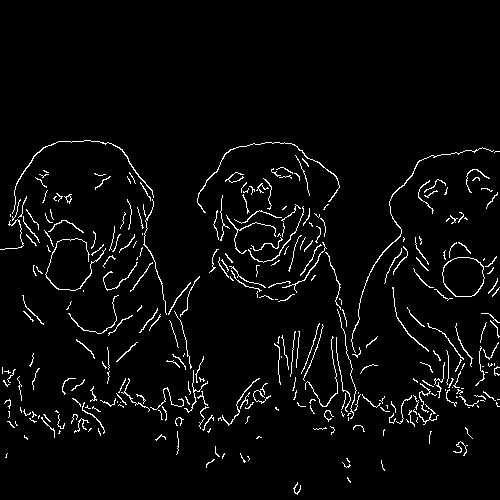

In [ ]:
canny = cv.Canny(blur, 125,175)
cv2_imshow(canny)

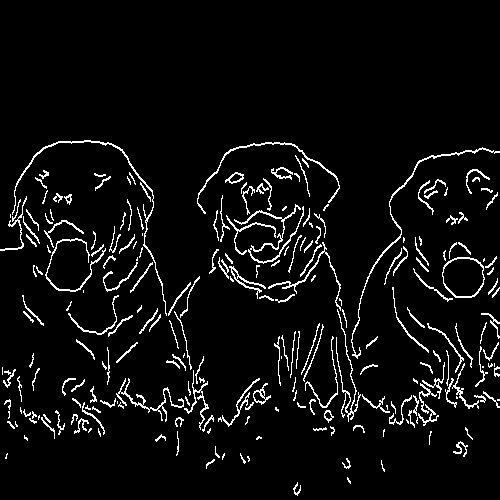

In [ ]:
dilated = cv.dilate(canny, (3,3), iterations = 1)
cv2_imshow(dilated)

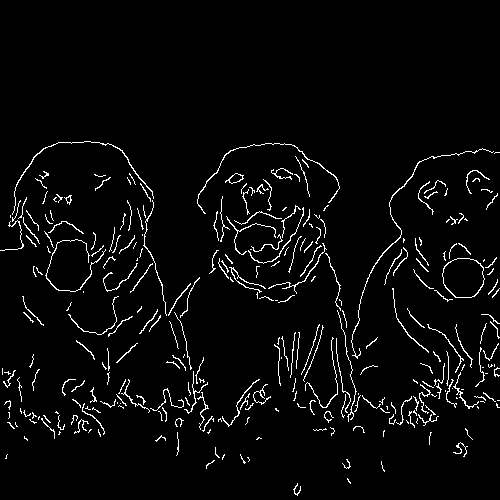

In [ ]:
eroded = cv.erode(dilated, (3,3),iterations = 1)
cv2_imshow(eroded)

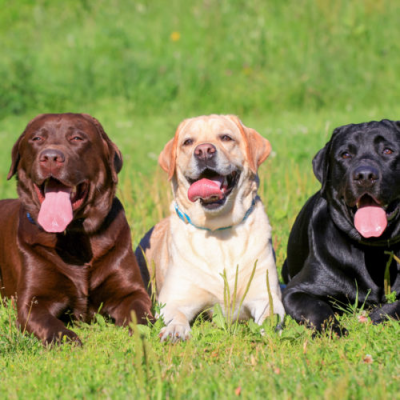

In [ ]:
resized = cv.resize(img,(400,400), interpolation = cv.INTER_AREA)
cv2_imshow(resized)

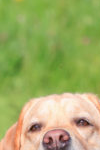

In [ ]:
crpped = img[50:200,200:300]
cv2_imshow(crpped)

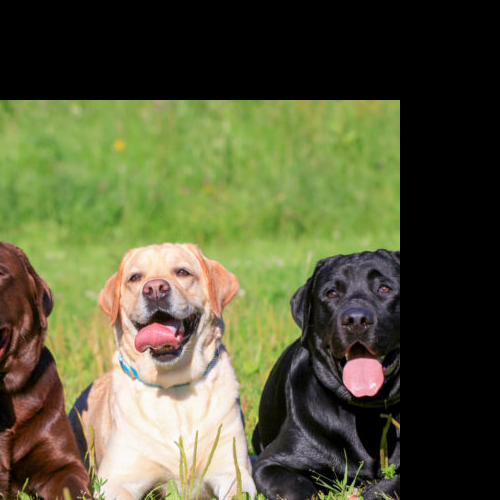

In [ ]:
def translation(img,x,y):
  transMat = np.float32([[1,0,x],[0,1,y]])
  dimensions = (img.shape[1],img.shape[0])
  return cv.warpAffine(img, transMat, dimensions)

translated = translation(img, -100,100)
cv2_imshow(translated)



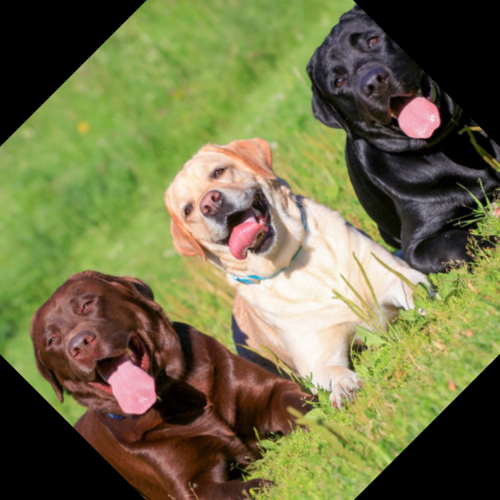

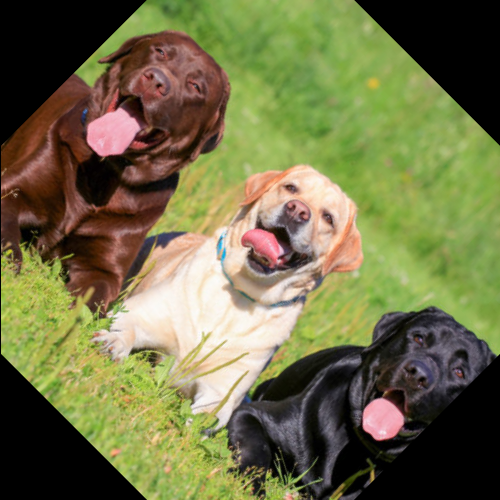

In [ ]:
def rotate(img,angle,rotPoint=None):
  (height,width) = img.shape[:2]

  if rotPoint is None:
    rotPoint = (width//2,height//2)

  rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions = (width,height)

  return cv.warpAffine(img, rotMat, dimensions)

rotated_image = rotate(img, 45)
cv2_imshow(rotated_image)

rota = rotate(rotated_image, -90)
cv2_imshow(rota)


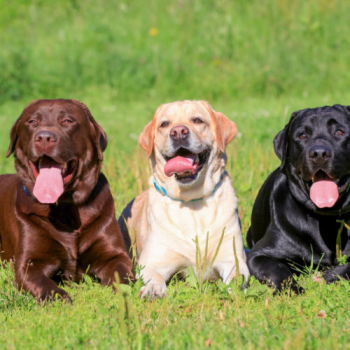

In [ ]:
resix = cv.resize(img,(350,350), interpolation = cv.INTER_AREA)
cv2_imshow(resix)

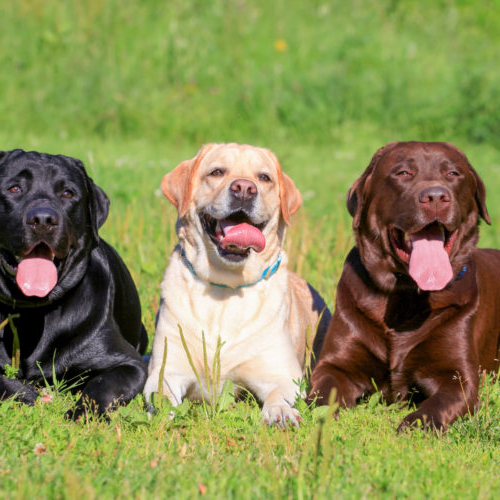

In [ ]:
flip = cv.flip(img , 1)
cv2_imshow(flip)

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('dog.jpg')
cv2_imshow(img)

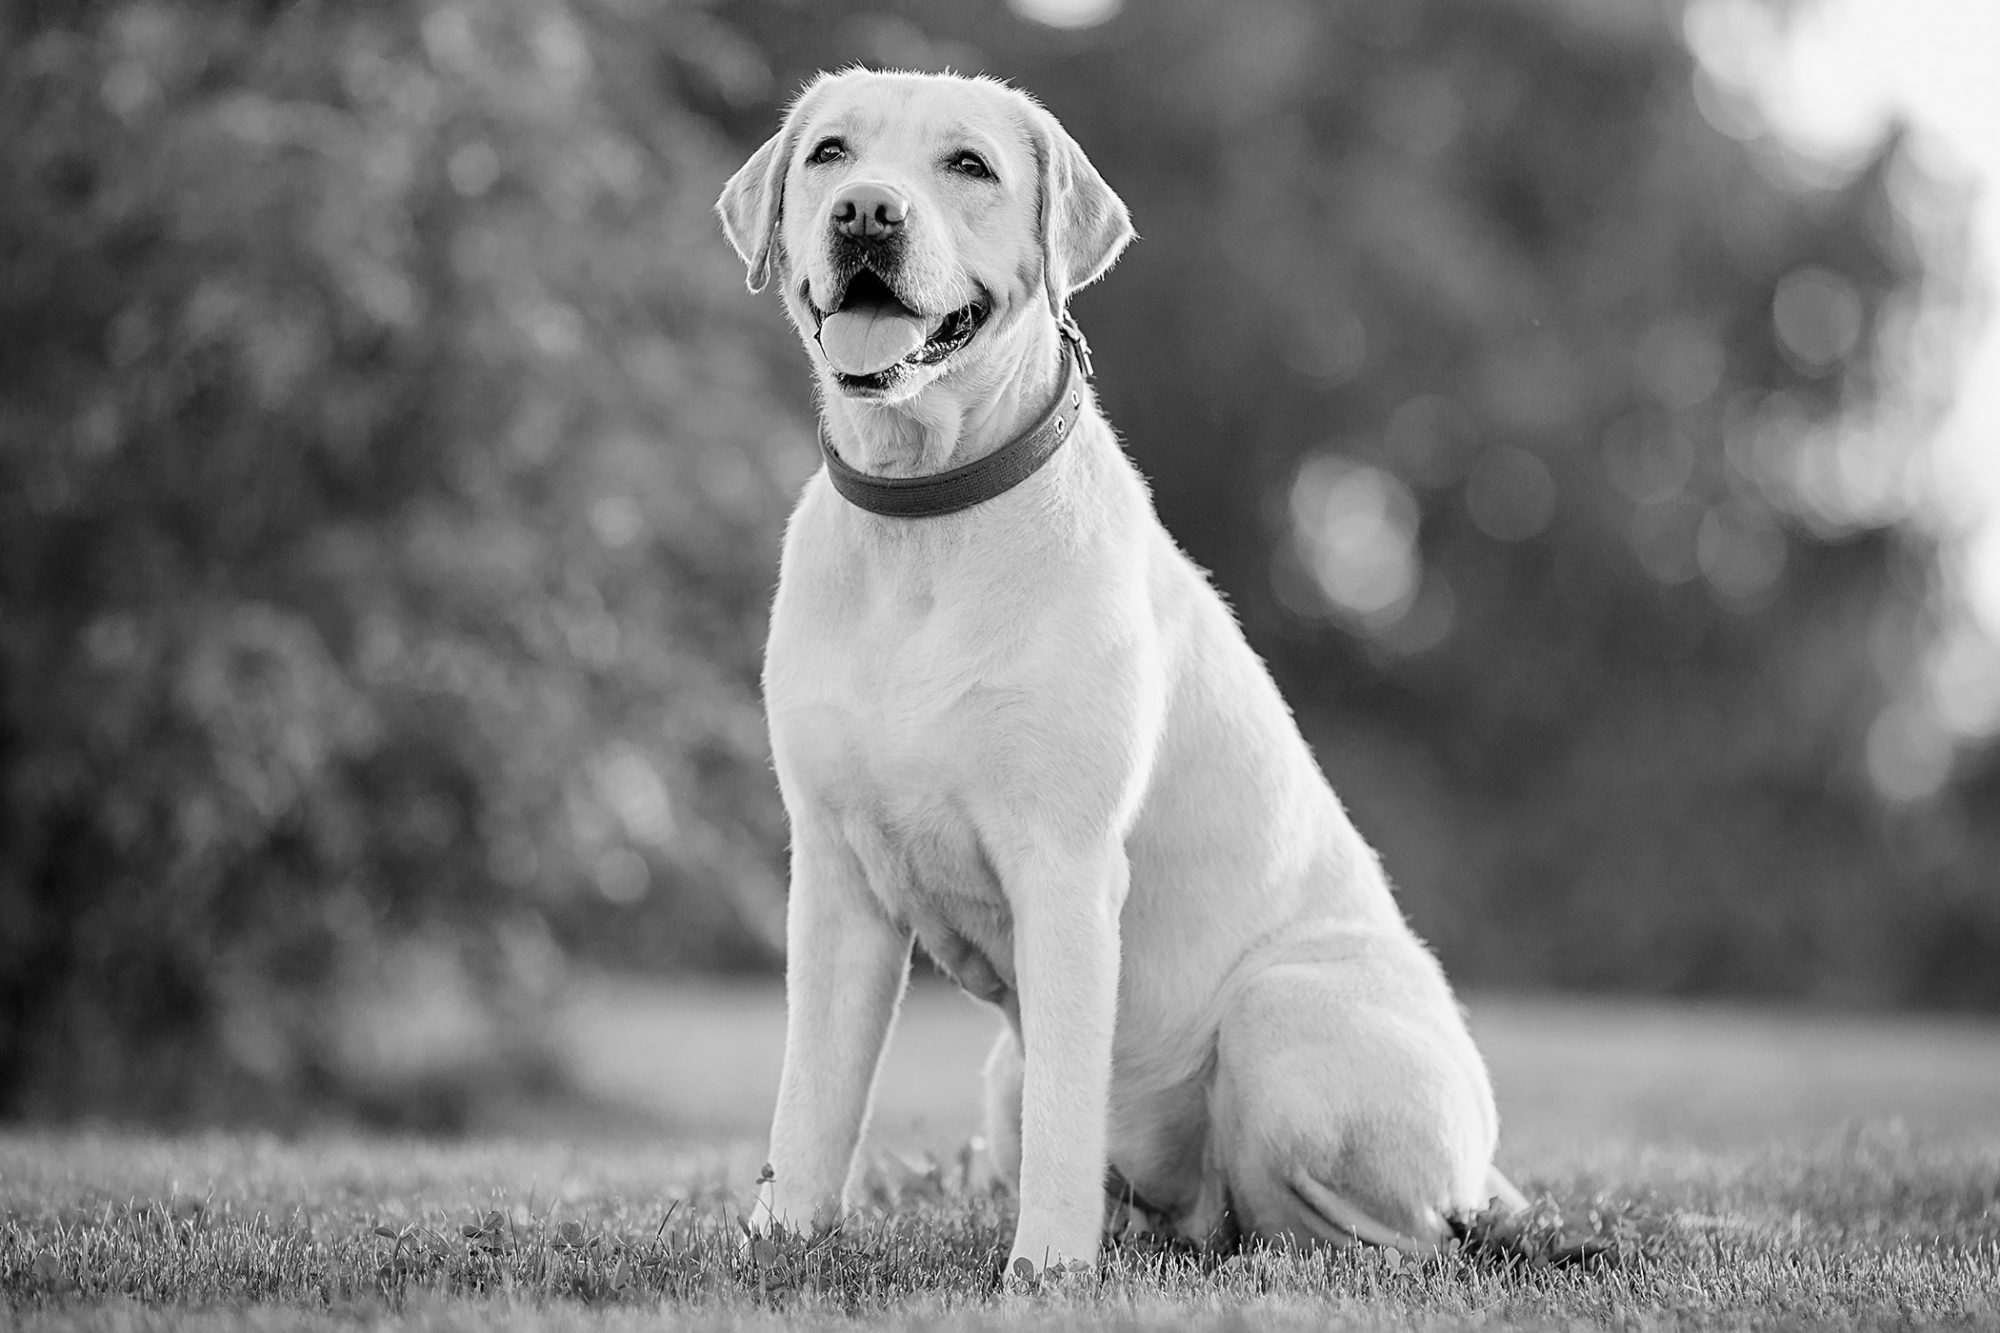

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

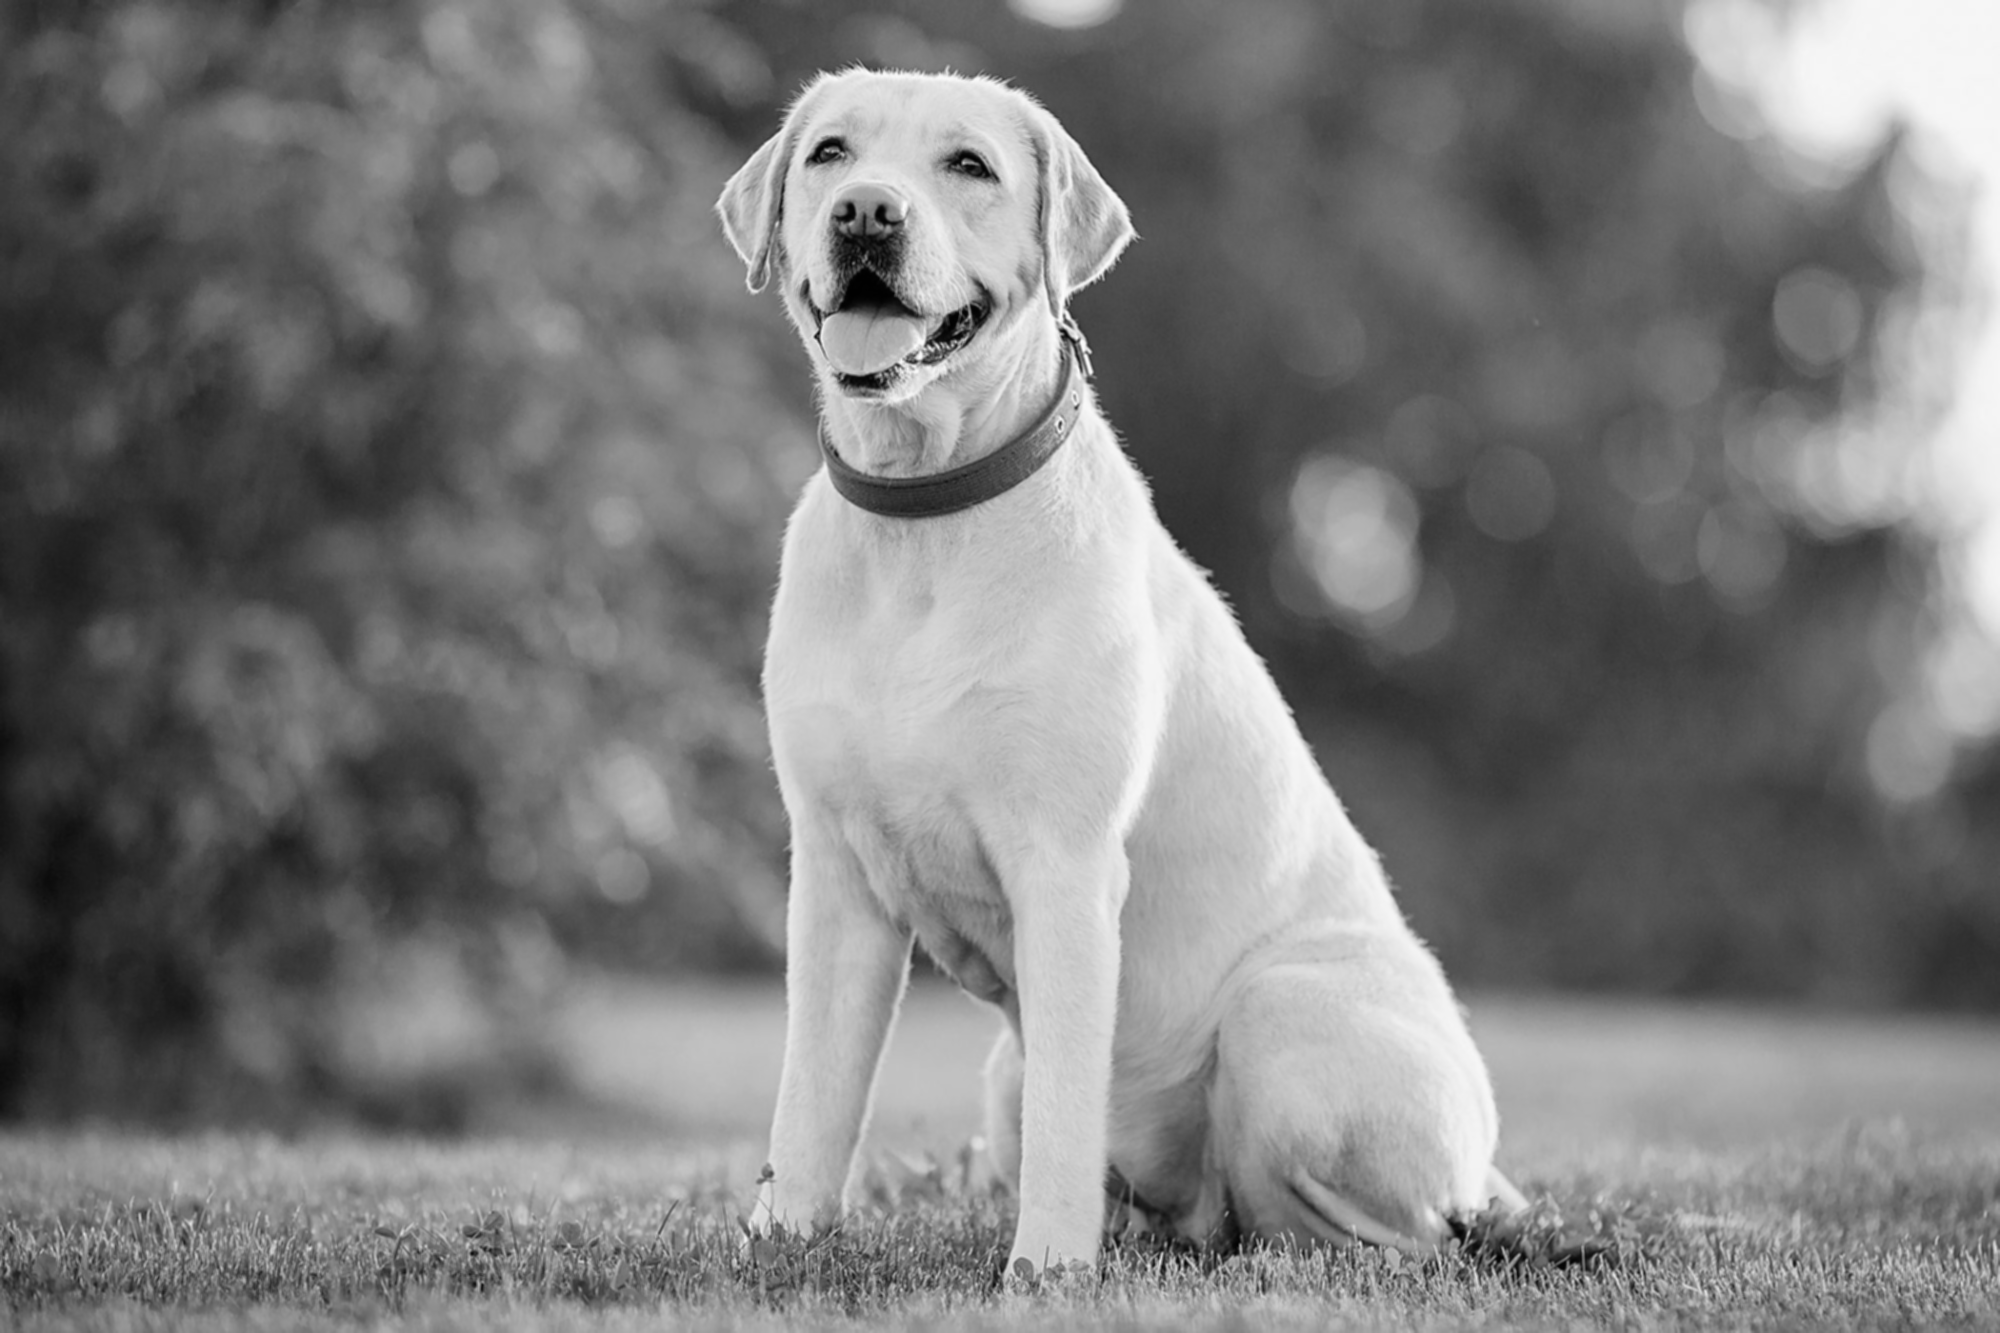

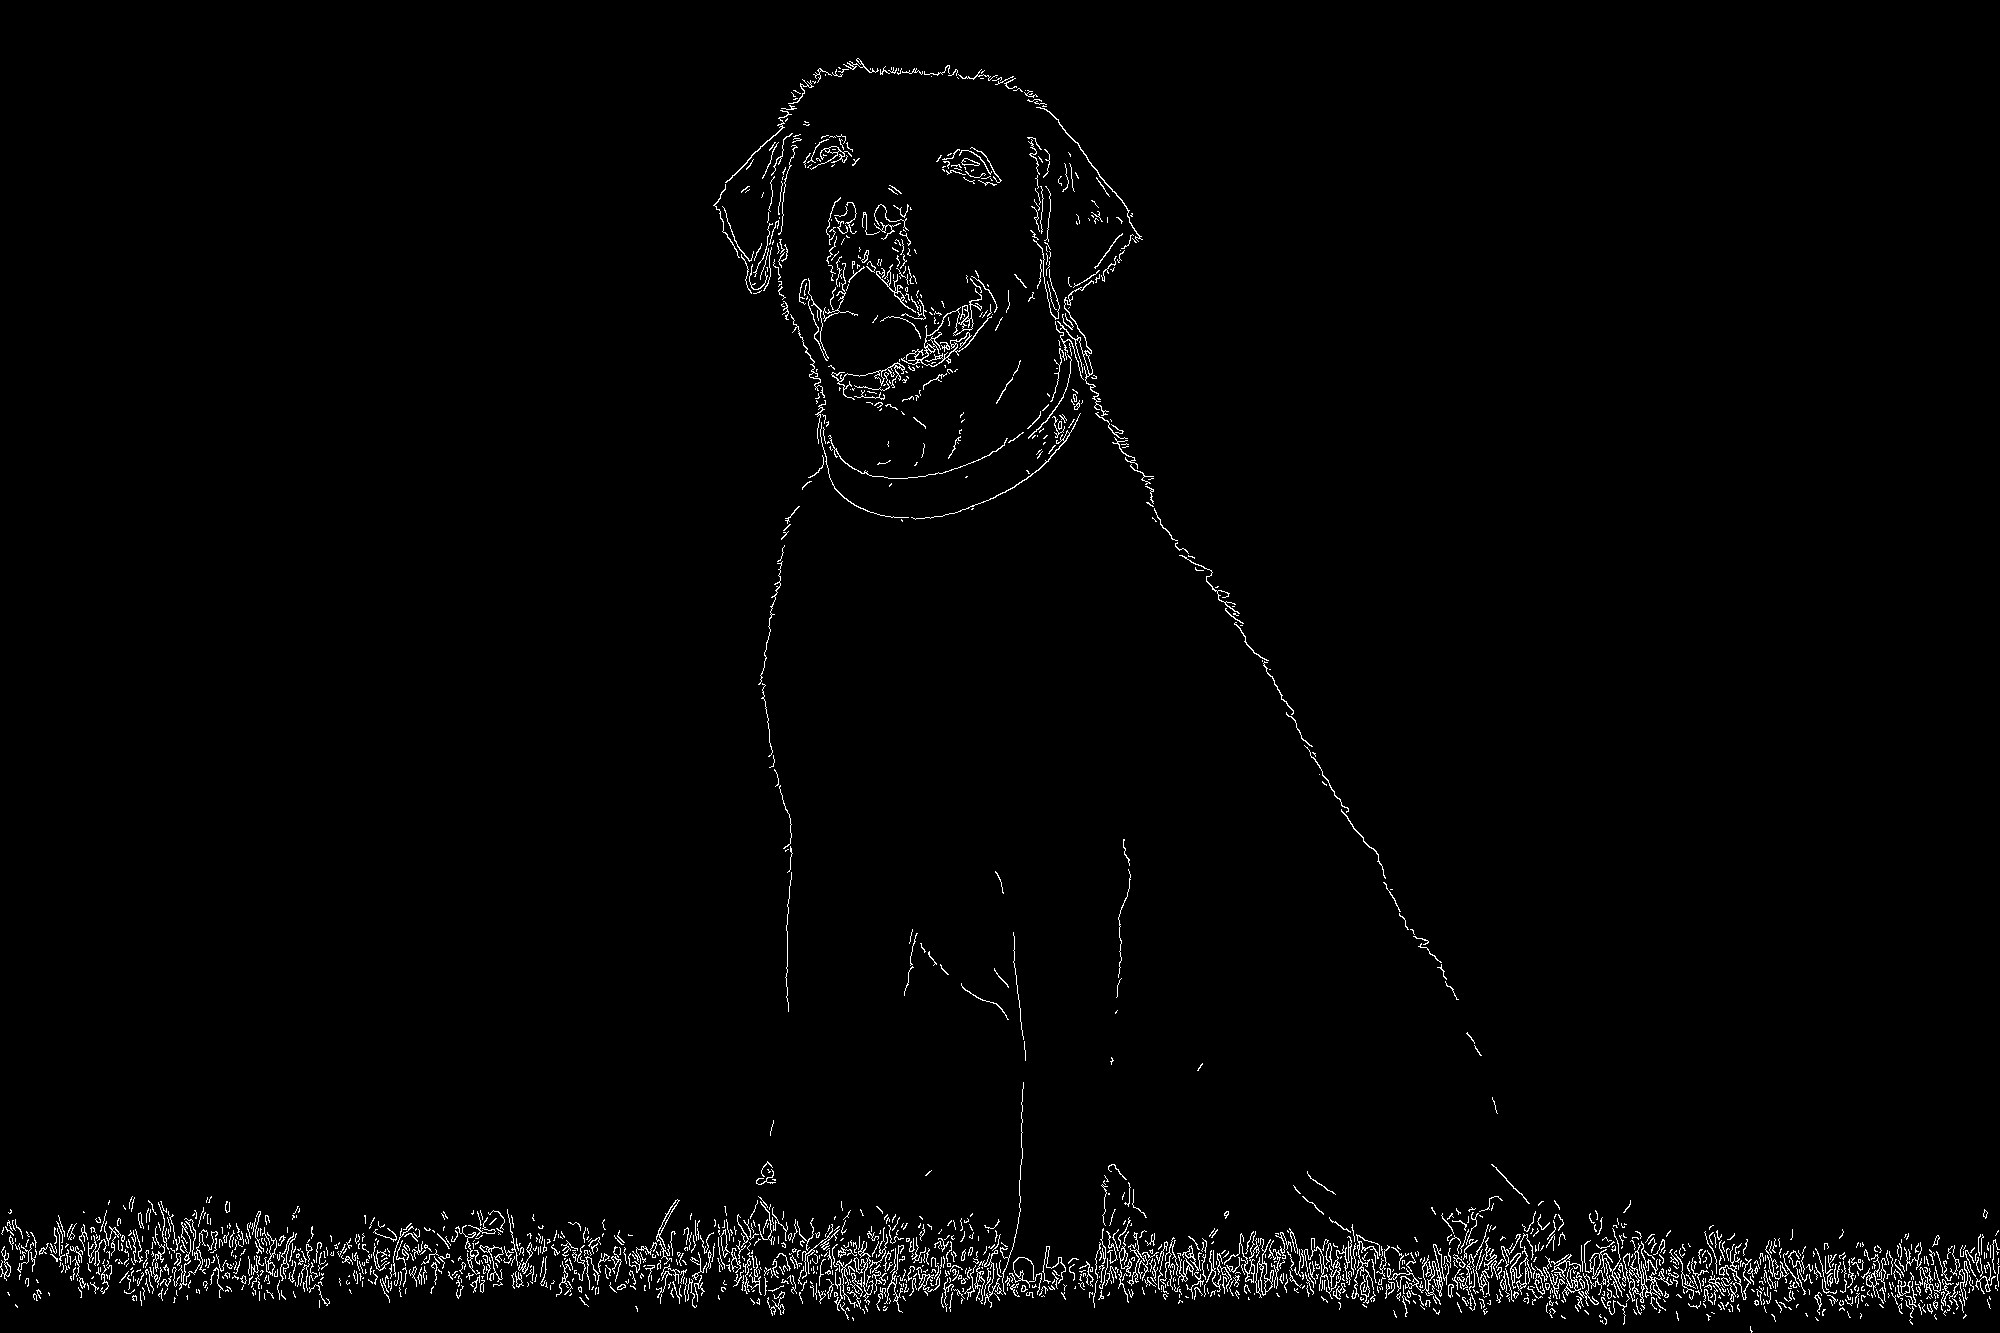

2092 contours(s) found


In [ ]:

blur = cv.GaussianBlur(gray, (3,3), cv.BORDER_DEFAULT)
cv2_imshow(blur)
canny = cv.Canny(blur,125,175)
cv2_imshow(canny)


contours,hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contours(s) found')

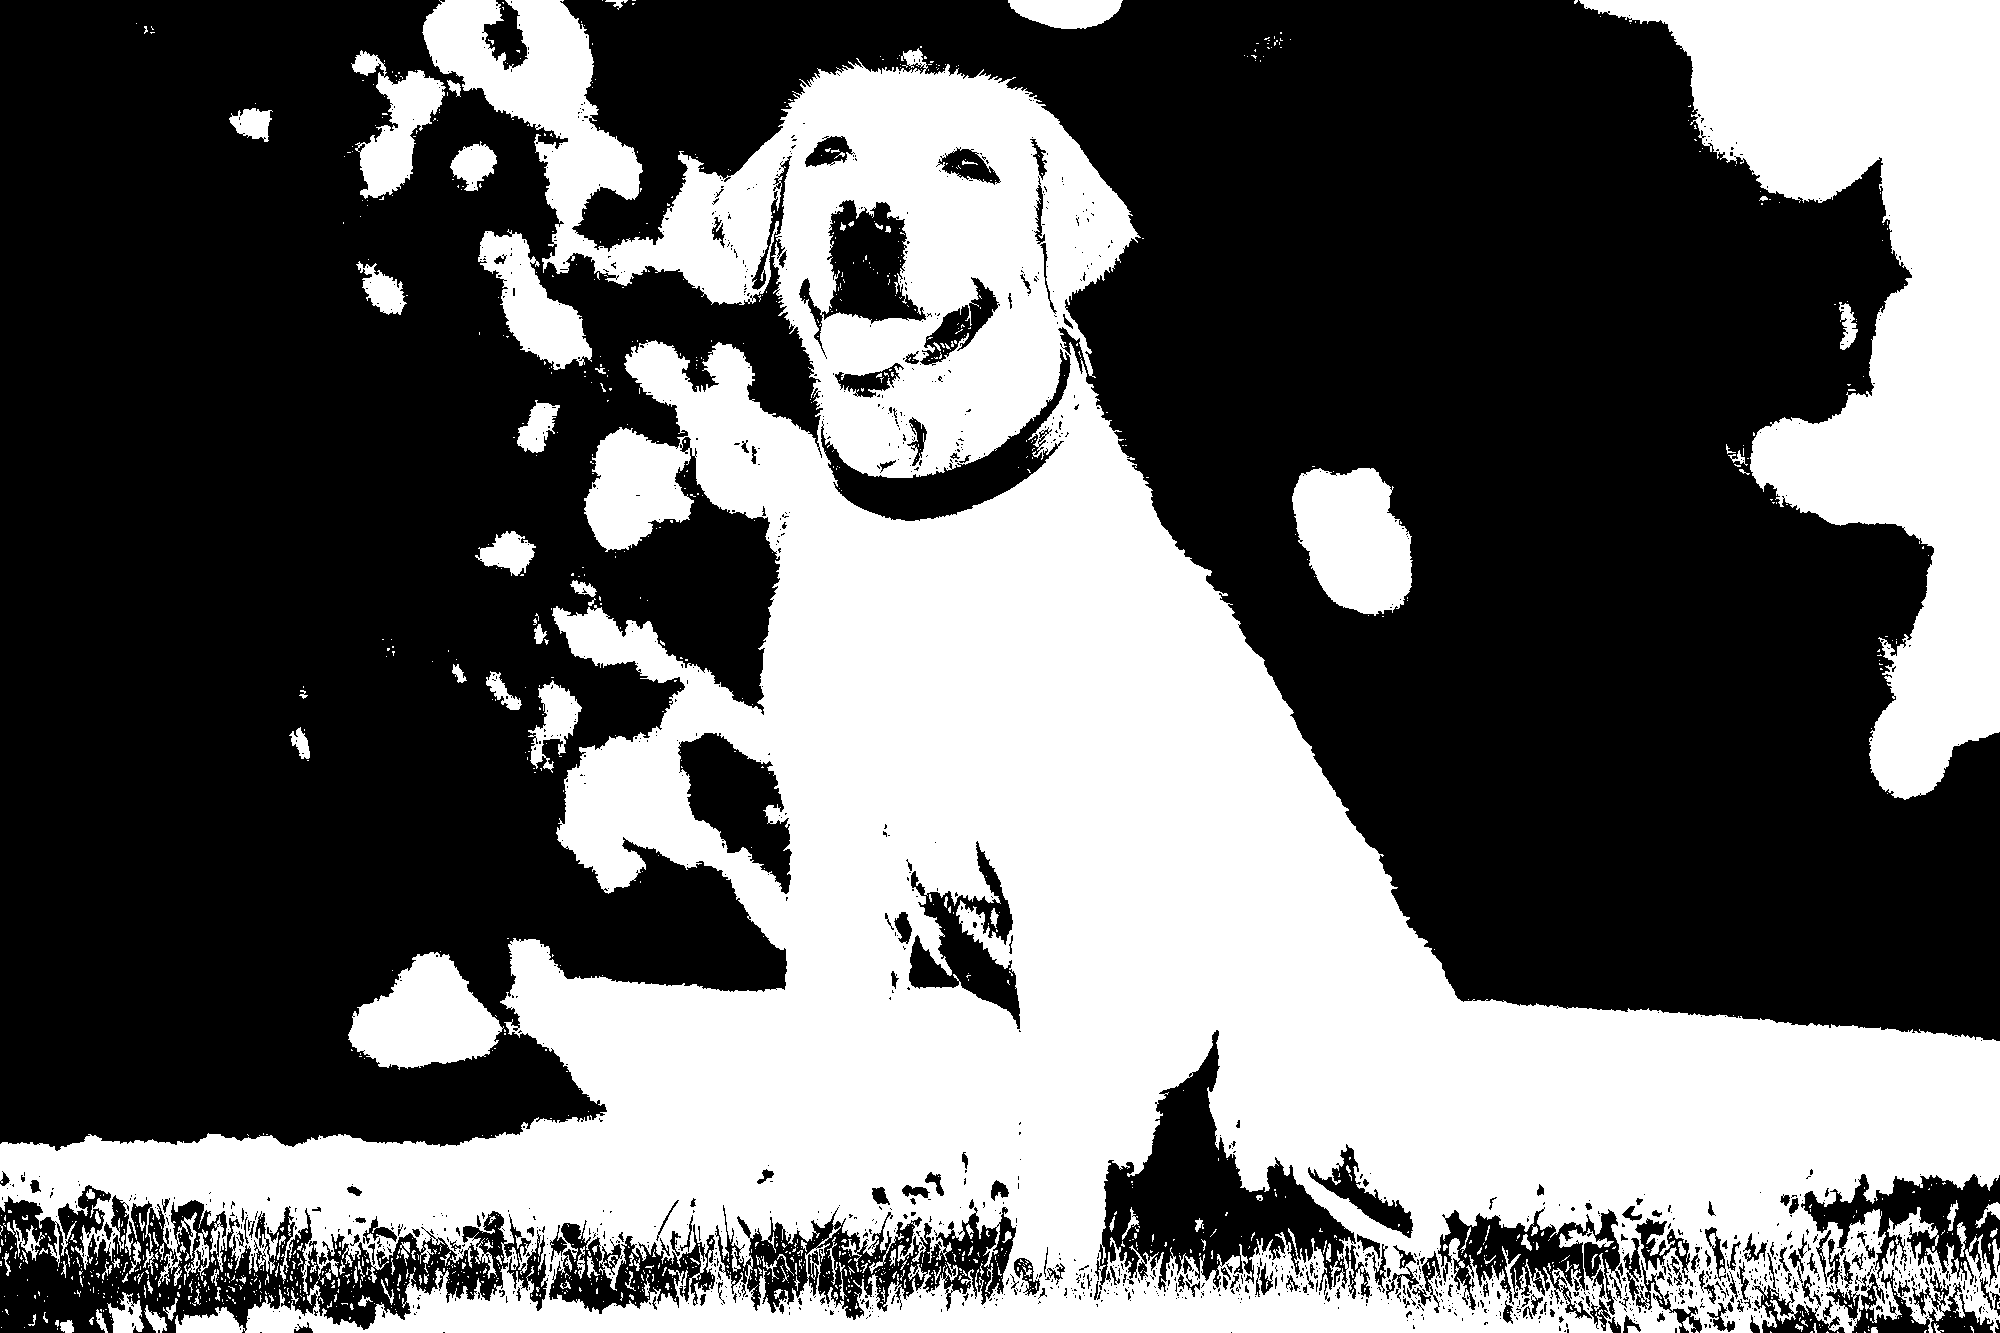

In [ ]:
ret,thresh = cv.threshold(gray,125,255,cv.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
b,g,r = cv.split(img)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
print(b.shape)
print(g.shape)
print(r.shape)

In [ ]:
merged = cv.merge([b,g,r])
cv2_imshow(merged)

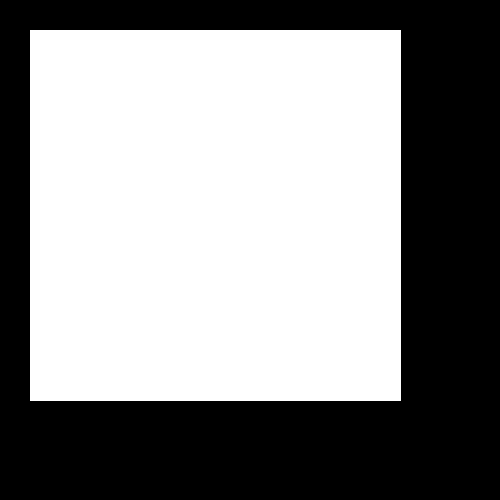

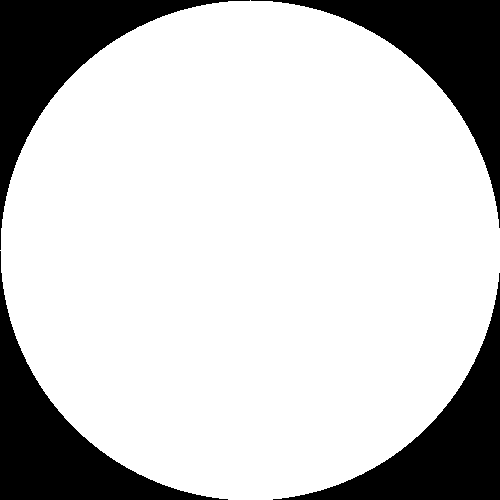

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 

blank = np.zeros((500,500),dtype = 'uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(400,400),255,-1)
circle = cv.circle(blank.copy(),(250,250),250,255,-1)
cv2_imshow(rectangle)
cv2_imshow(circle)

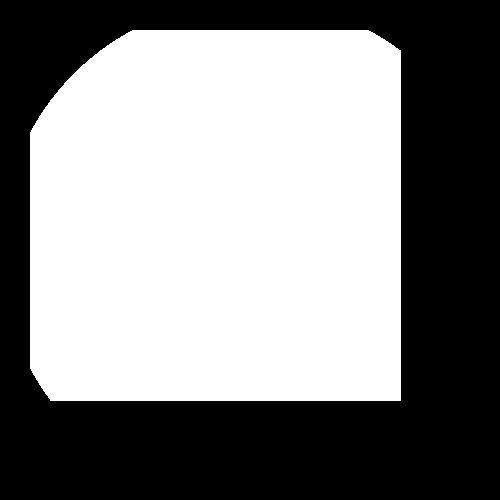

In [ ]:
bitwise_and = cv.bitwise_and(rectangle,circle)
cv2_imshow(bitwise_and)

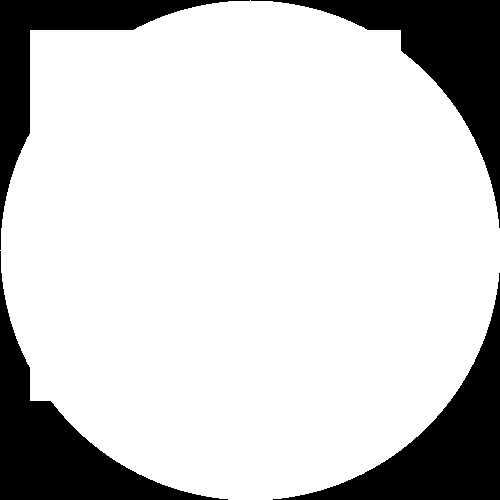

In [ ]:
bitwise_or = cv.bitwise_or(rectangle,circle)
cv2_imshow(bitwise_or)


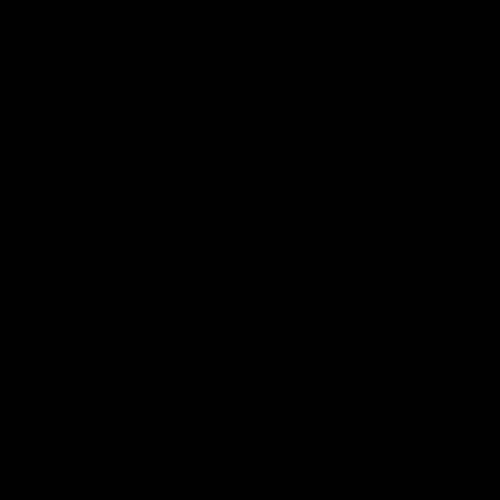

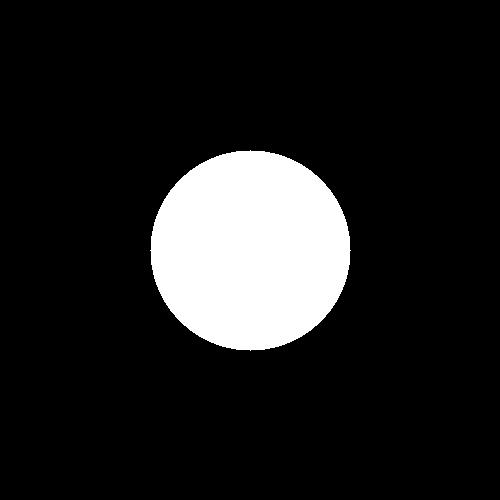

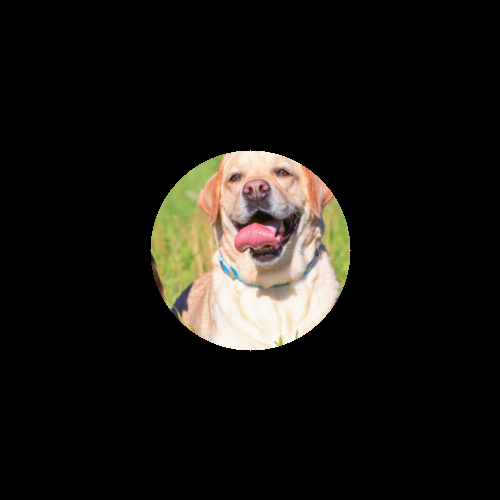

In [ ]:
img = cv.imread('dog1.jpeg')

blank1 = np.zeros(img.shape[:2],dtype = 'uint8')
cv2_imshow(blank1)
mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv2_imshow(mask)
maked = cv.bitwise_and(img,img,mask=mask)
cv2_imshow(maked)

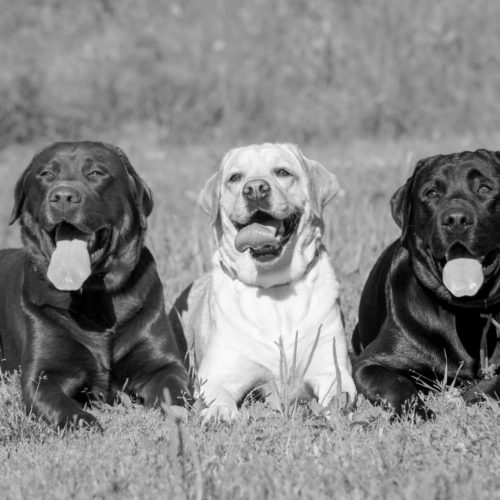

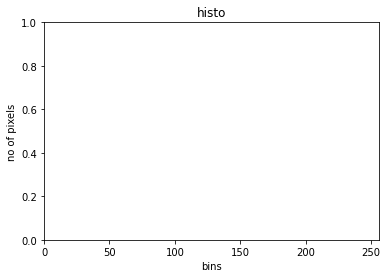

In [ ]:
import matplotlib.pyplot as plt
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray_hist = cv.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.title("histo")
plt.xlabel('bins')
plt.ylabel('no of pixels')
plt.xlim(0,256)
plt.show()


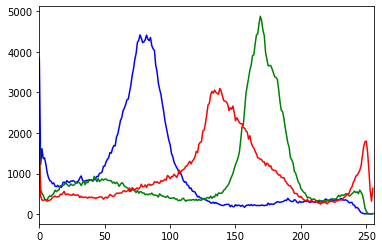

In [ ]:
colors = ("b","g","r")
for i,col in enumerate(colors):
  hist = cv.calcHist([img],[i],None,[256],[0,256])
  plt.plot(hist, color = col)
  plt.xlim(0,256)

plt.show()

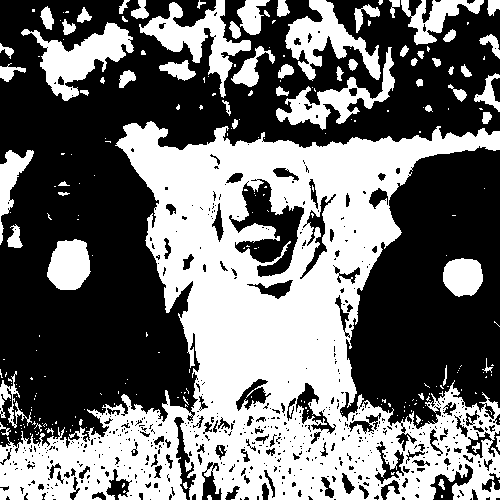

In [ ]:
threshold,thresh = cv.threshold(gray,150,256,cv.THRESH_BINARY)
cv2_imshow(thresh)

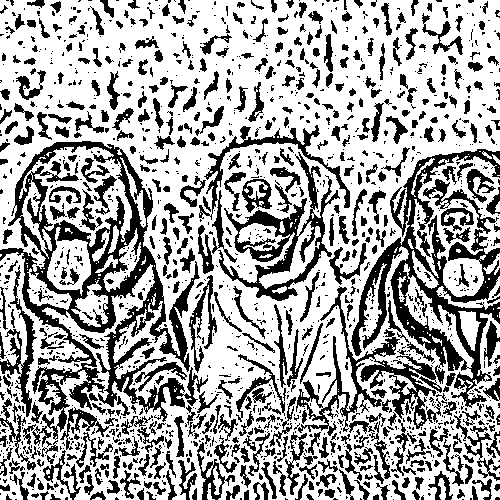

In [ ]:
adapt = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
cv2_imshow(adapt)

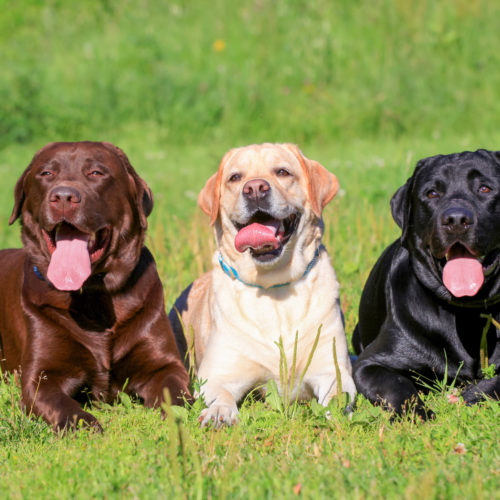

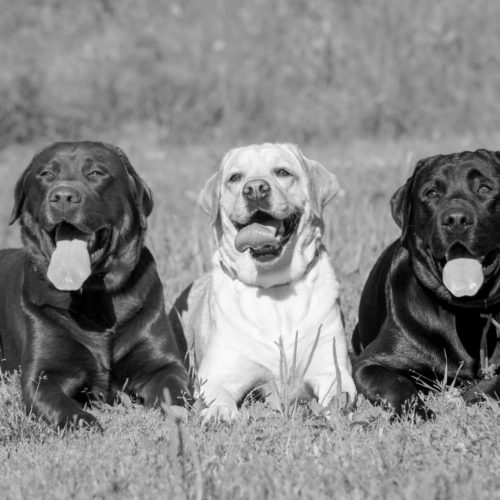

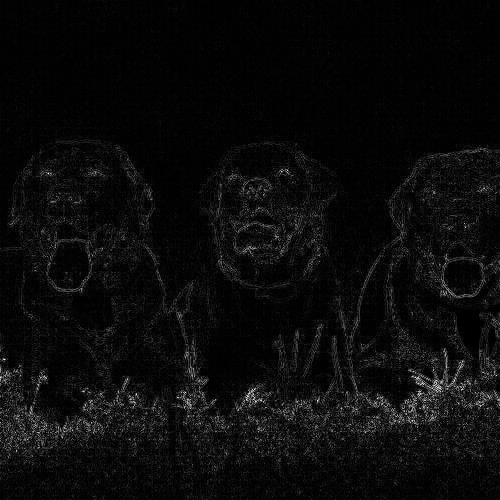

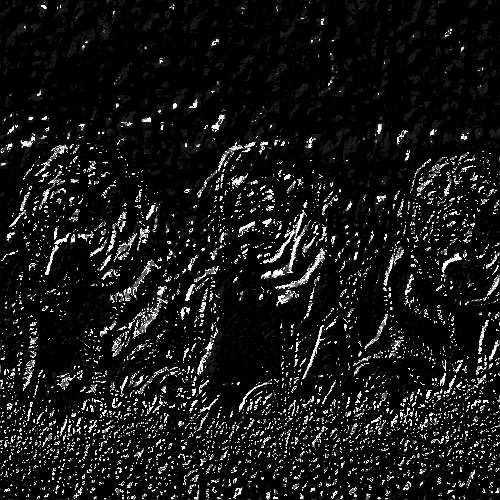

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 

img = cv.imread("dog1.jpeg")
cv2_imshow(img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

sobelx = cv.Sobel(gray,cv.CV_64F,1,0)
sobely = cv.Sobel(gray,cv.CV_64F,0,1)

comb = cv.bitwise_or(sobelx,sobely)
cv2_imshow(comb)

In [ ]:
img = cv.imread('
+')
cv.imshow('Group of 5 people', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray People', gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Faces', img)



cv.waitKey(0)

In [ ]:
import numpy as np
import cv2 as cv

haar_cascade = cv.CascadeClassifier('haar_face.xml')

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
# features = np.load('features.npy', allow_pickle=True)
# labels = np.load('labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

img = cv.imread(r'../Resources\Faces\val\elton_john/1.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Person', gray)

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv.imshow('Detected Face', img)

cv.waitKey(0)

In [ ]:
import os
import cv2 as cv
import numpy as np

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'..Media Files\Faces\train'

haar_cascade = cv.CascadeClassifier('haar_face.xml')

features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path,img)

            img_array = cv.imread(img_path)
            if img_array is None:
                continue 
                
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

create_train()
print('Training done ---------------')

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)